## Cryptocurrency Trading Algorithm 

A Python-based project implementing a trading strategy to optimize profits by automating buy/sell decisions in the volatile cryptocurrency market.



##### First, we'll need a way to retrieve the cryptocurrency market data we need. Yahoo Finance is a popular website and service that provides up-to-date financial news and market quotes. Luckily, there is a Python library called yfinance that allows you to easily access and save this data. Let's go ahead and install it.

In [1]:
!pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/bc/10/b84f1b2a81e19659bb272ec7bf9a53192468cbdf0725e82f5225bed5053a/yfinance-0.2.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pandas>=1.3.0 from https://files.pythonhosted.org/packages/8f/bb/aea1fbeed5b474cb8634364718abe9030d7cc7a30bf51f40bd494bbc89a2/pandas-2.0.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for numpy>=1.16.5 from https://files.pythonhosted.org/packages/48/73/df07644e8fa1127a7985db70cf1d07123004e2dd7a3cf33e8b83297a775b/numpy-1.25.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for lxml>=4.9.1 from https://files.pythonhosted.org/packages/d6/56/9d5cb3438143a5aebad59088ca392950d74a531e1b96d0959144370b3b59/lxml-4.9.3-cp311-cp311-macosx_11_0_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.3/502.3 kB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/f6/22/9c31044ff7339c63727a135872e5cb59564f11625372a81c3eebf148f4af/matplotlib-3.7.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/88/e3/696e96ee197b1f60242d12b215332af9fc1961c81990c8b5630b89b34ce6/contourpy-1.1.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/e3/a6/5e8c6dfd239fe281b1aa9408a7d681e82182295fb87d05e086e1e2fd376c/fonttools-4.41.0-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 536.1 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 10.6 MB/s eta 0:00:00
  Obtaining dependency information for pillow>=6.2.0 from https://files.pythonhosted.org/packages/b7/ad/71982d18fd28ed1f93c31b8648f980ebdbdbcf7d8c

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

#### The yfinance library comes with a pre-built function that allows us to fetch past market data. Utilizing this function, we can obtain the Bitcoin-to-US Dollar exchange rate for the year 2022. To do this, we employ the download() function, specifying the desired ticker ("BTC-USD"), the start and end dates, and the interval between data points, which, in this case, we set to one day.

In [8]:
# Retrieve two weeks of Bitcoin to USD exchange rates with a 1 hour interval and save the dataframe to a variable.
BTC_USD = yf.download("BTC-USD", start='2022-01-01', end='2022-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [9]:
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2022-01-03,47343.542969,47510.726562,45835.964844,46458.117188,46458.117188,33071628362
2022-01-04,46458.851562,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


As you can see, the dataframe has 7 columns. The first column gives the date, the second column gives the opening price of Bitcoin in USD for the day, followed by the day's price high and low, then the day's closing and adjusted closing prices, and finally, the trading volume.

## Creating Price Chart


Price charts helps us in understanding and analyzing a given stock or currency. They are a time series showing an asset's price over time. The most basic type of price chart is the line chart, so let's go ahead and make one of those. We have used matplotlib library to create a chart. 

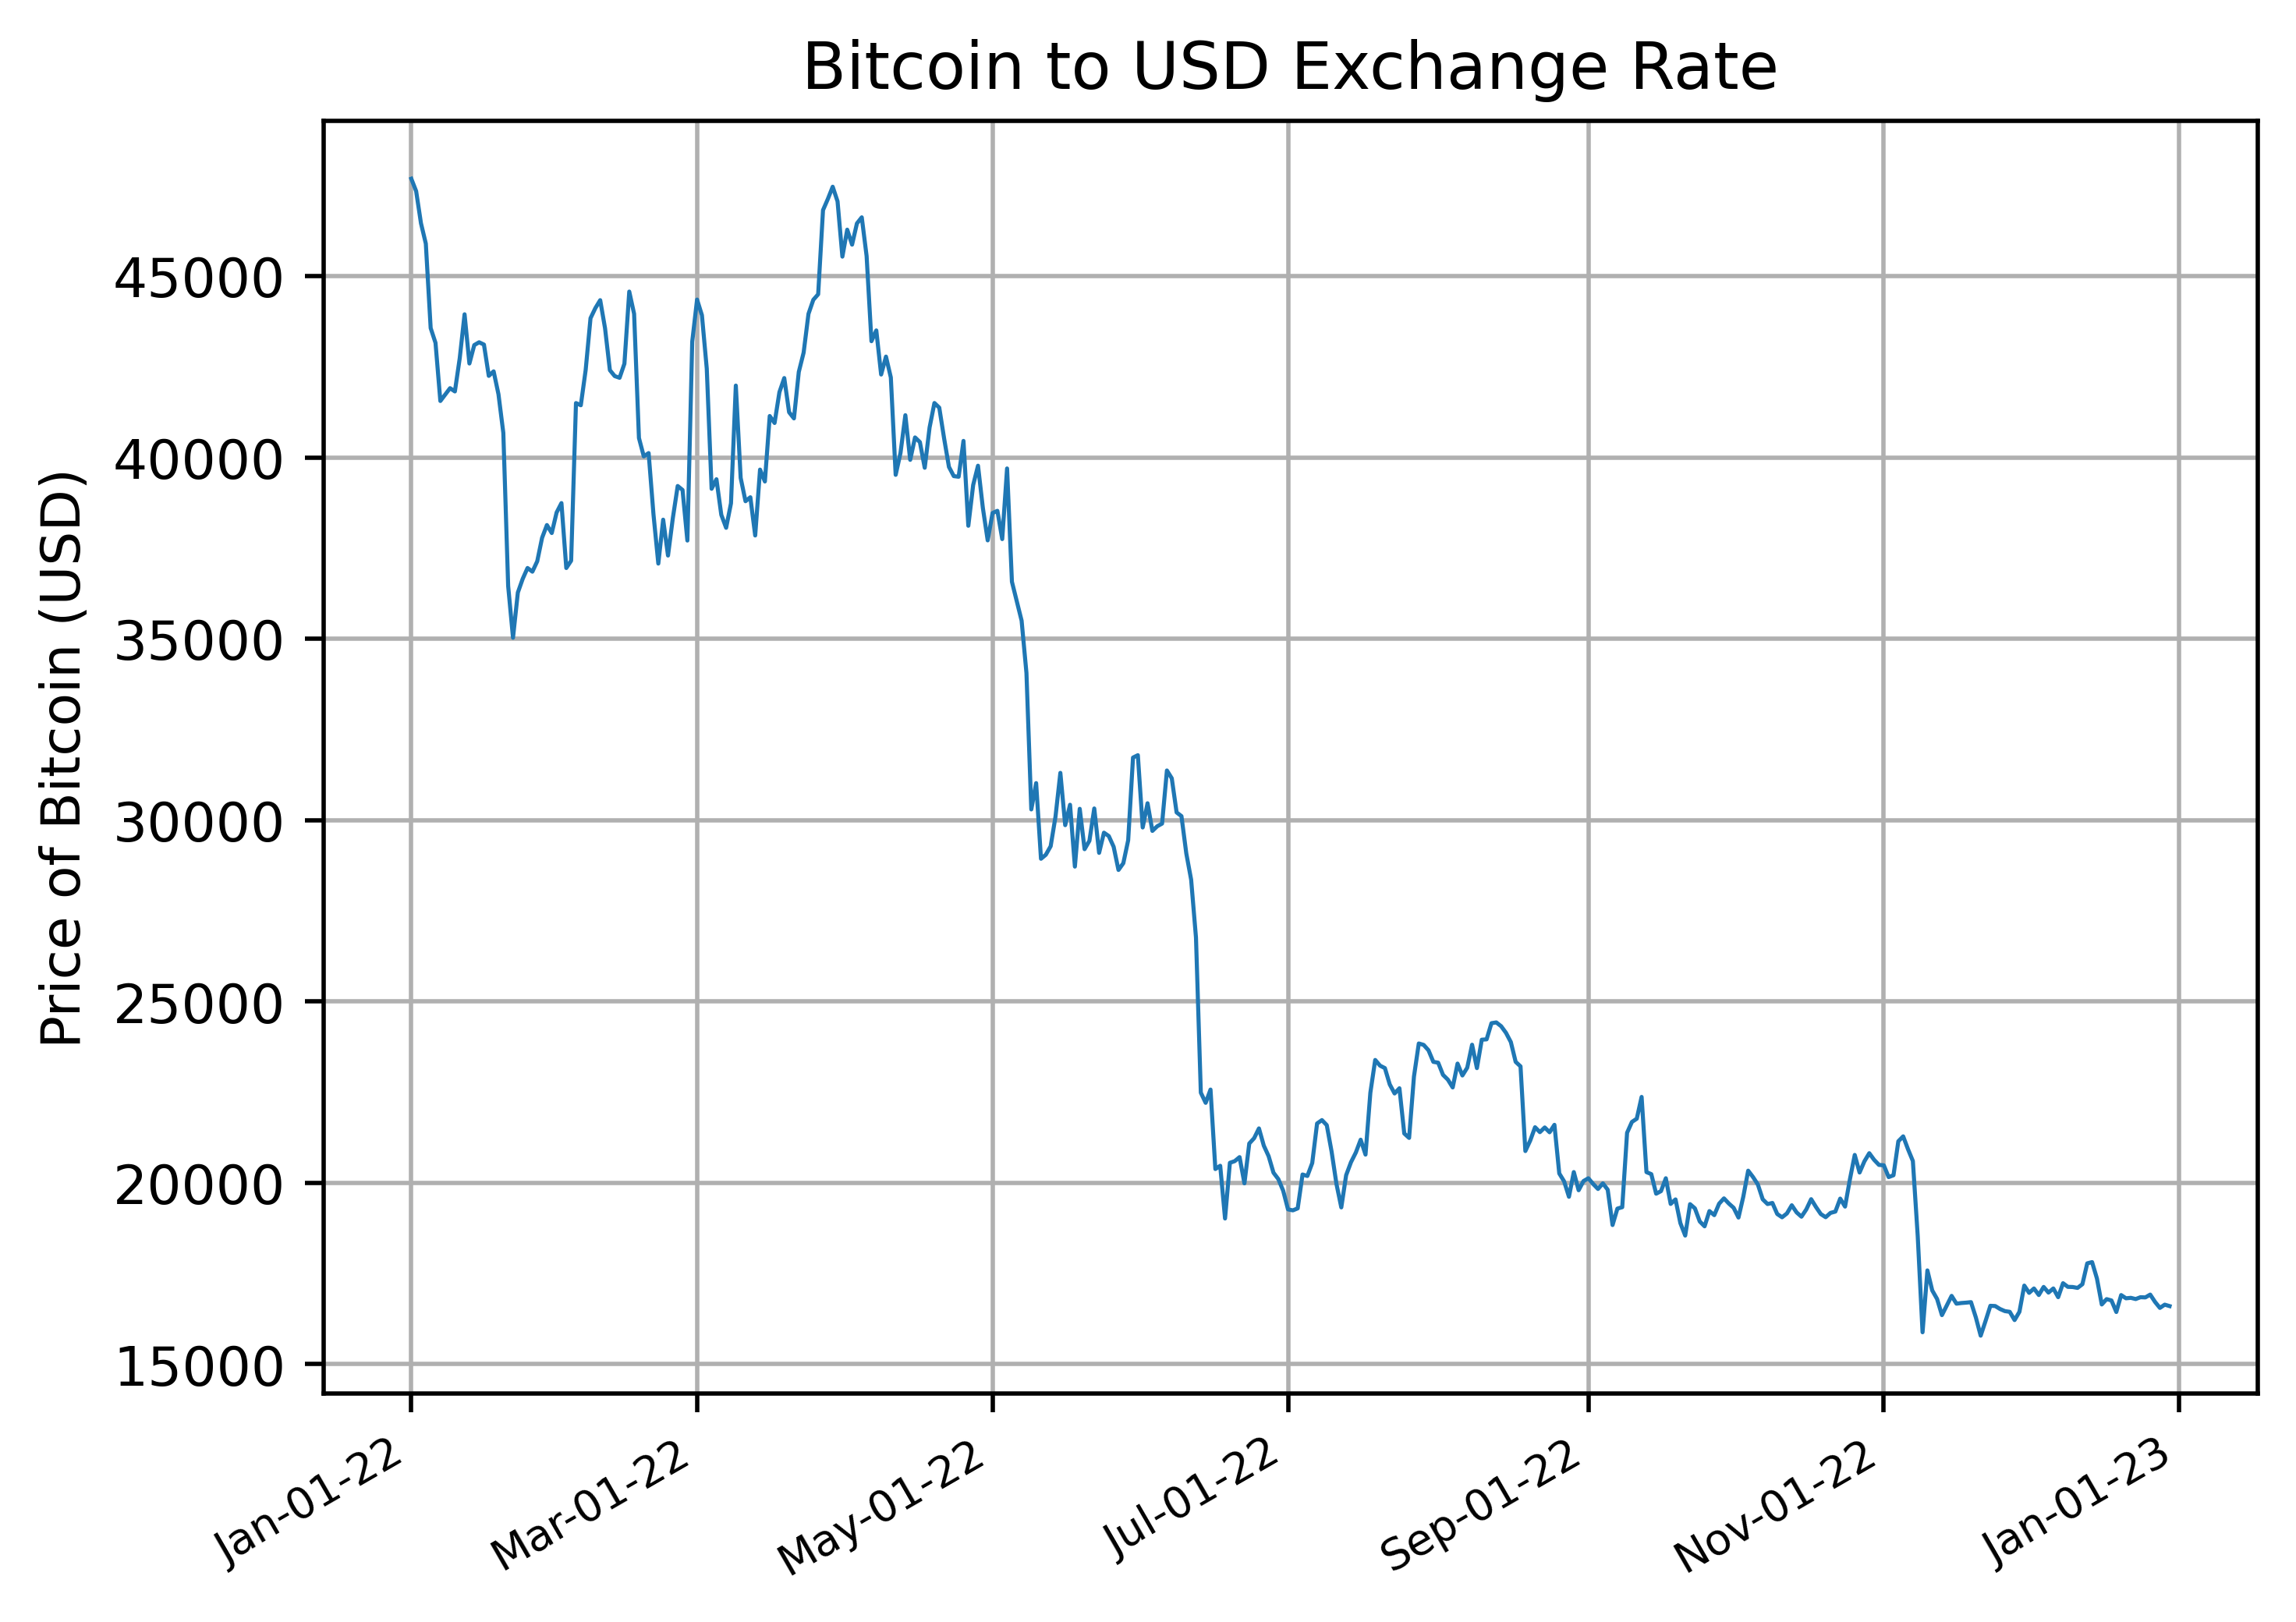

In [11]:
fig, ax = plt.subplots(dpi=500)
# This line creates a new figure (fig) and an axis object (ax) using the subplots function from matplotlib. 
#The dpi argument sets the dots-per-inch for the figure, which affects the resolution of the plot.

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# #This line plots the closing prices of Bitcoin against the corresponding dates. (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)
#The data for the Bitcoin-to-US Dollar exchange rate is stored in the BTC_USD DataFrame
#In financial data, such as stock or cryptocurrency market data, the 'Close' column typically represents the closing price of the asset for a specific time interval.
#The lw=0.75 parameter sets the line width to 0.75 for a thinner line.

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

## Analysis 

A Moving Average is a staple in the analysis of price charts. It's calculated by creating a series of averages of subsets of the data we have. 

In [14]:
# Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()
# Display the last 5 entries of the dataframe
BTC_USD.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA_9,SMA_30
Date,,,,,,,,
2022-12-26,16842.250000,16920.123047,16812.369141,16919.804688,16919.804688,11886957804,16795.370877,16955.040039
2022-12-27,16919.291016,16959.845703,16642.072266,16717.173828,16717.173828,15748580239,16790.837240,16964.124935
2022-12-28,16716.400391,16768.169922,16497.556641,16552.572266,16552.572266,17005713920,16803.380859,16975.299935
2022-12-29,16552.322266,16651.755859,16508.683594,16642.341797,16642.341797,14472237479,16774.051649,16981.878581
2022-12-30,16641.330078,16643.427734,16408.474609,16602.585938,16602.585938,15929162910,16750.168403,16963.012565


added a new column to the BTC_USD dataframe called SMA_9 that contains the datapoints for a 9-day Simple Moving Average and a column containing a Simple Moving Average using an interval size of 30 day

## Plotting Simple Moving Average

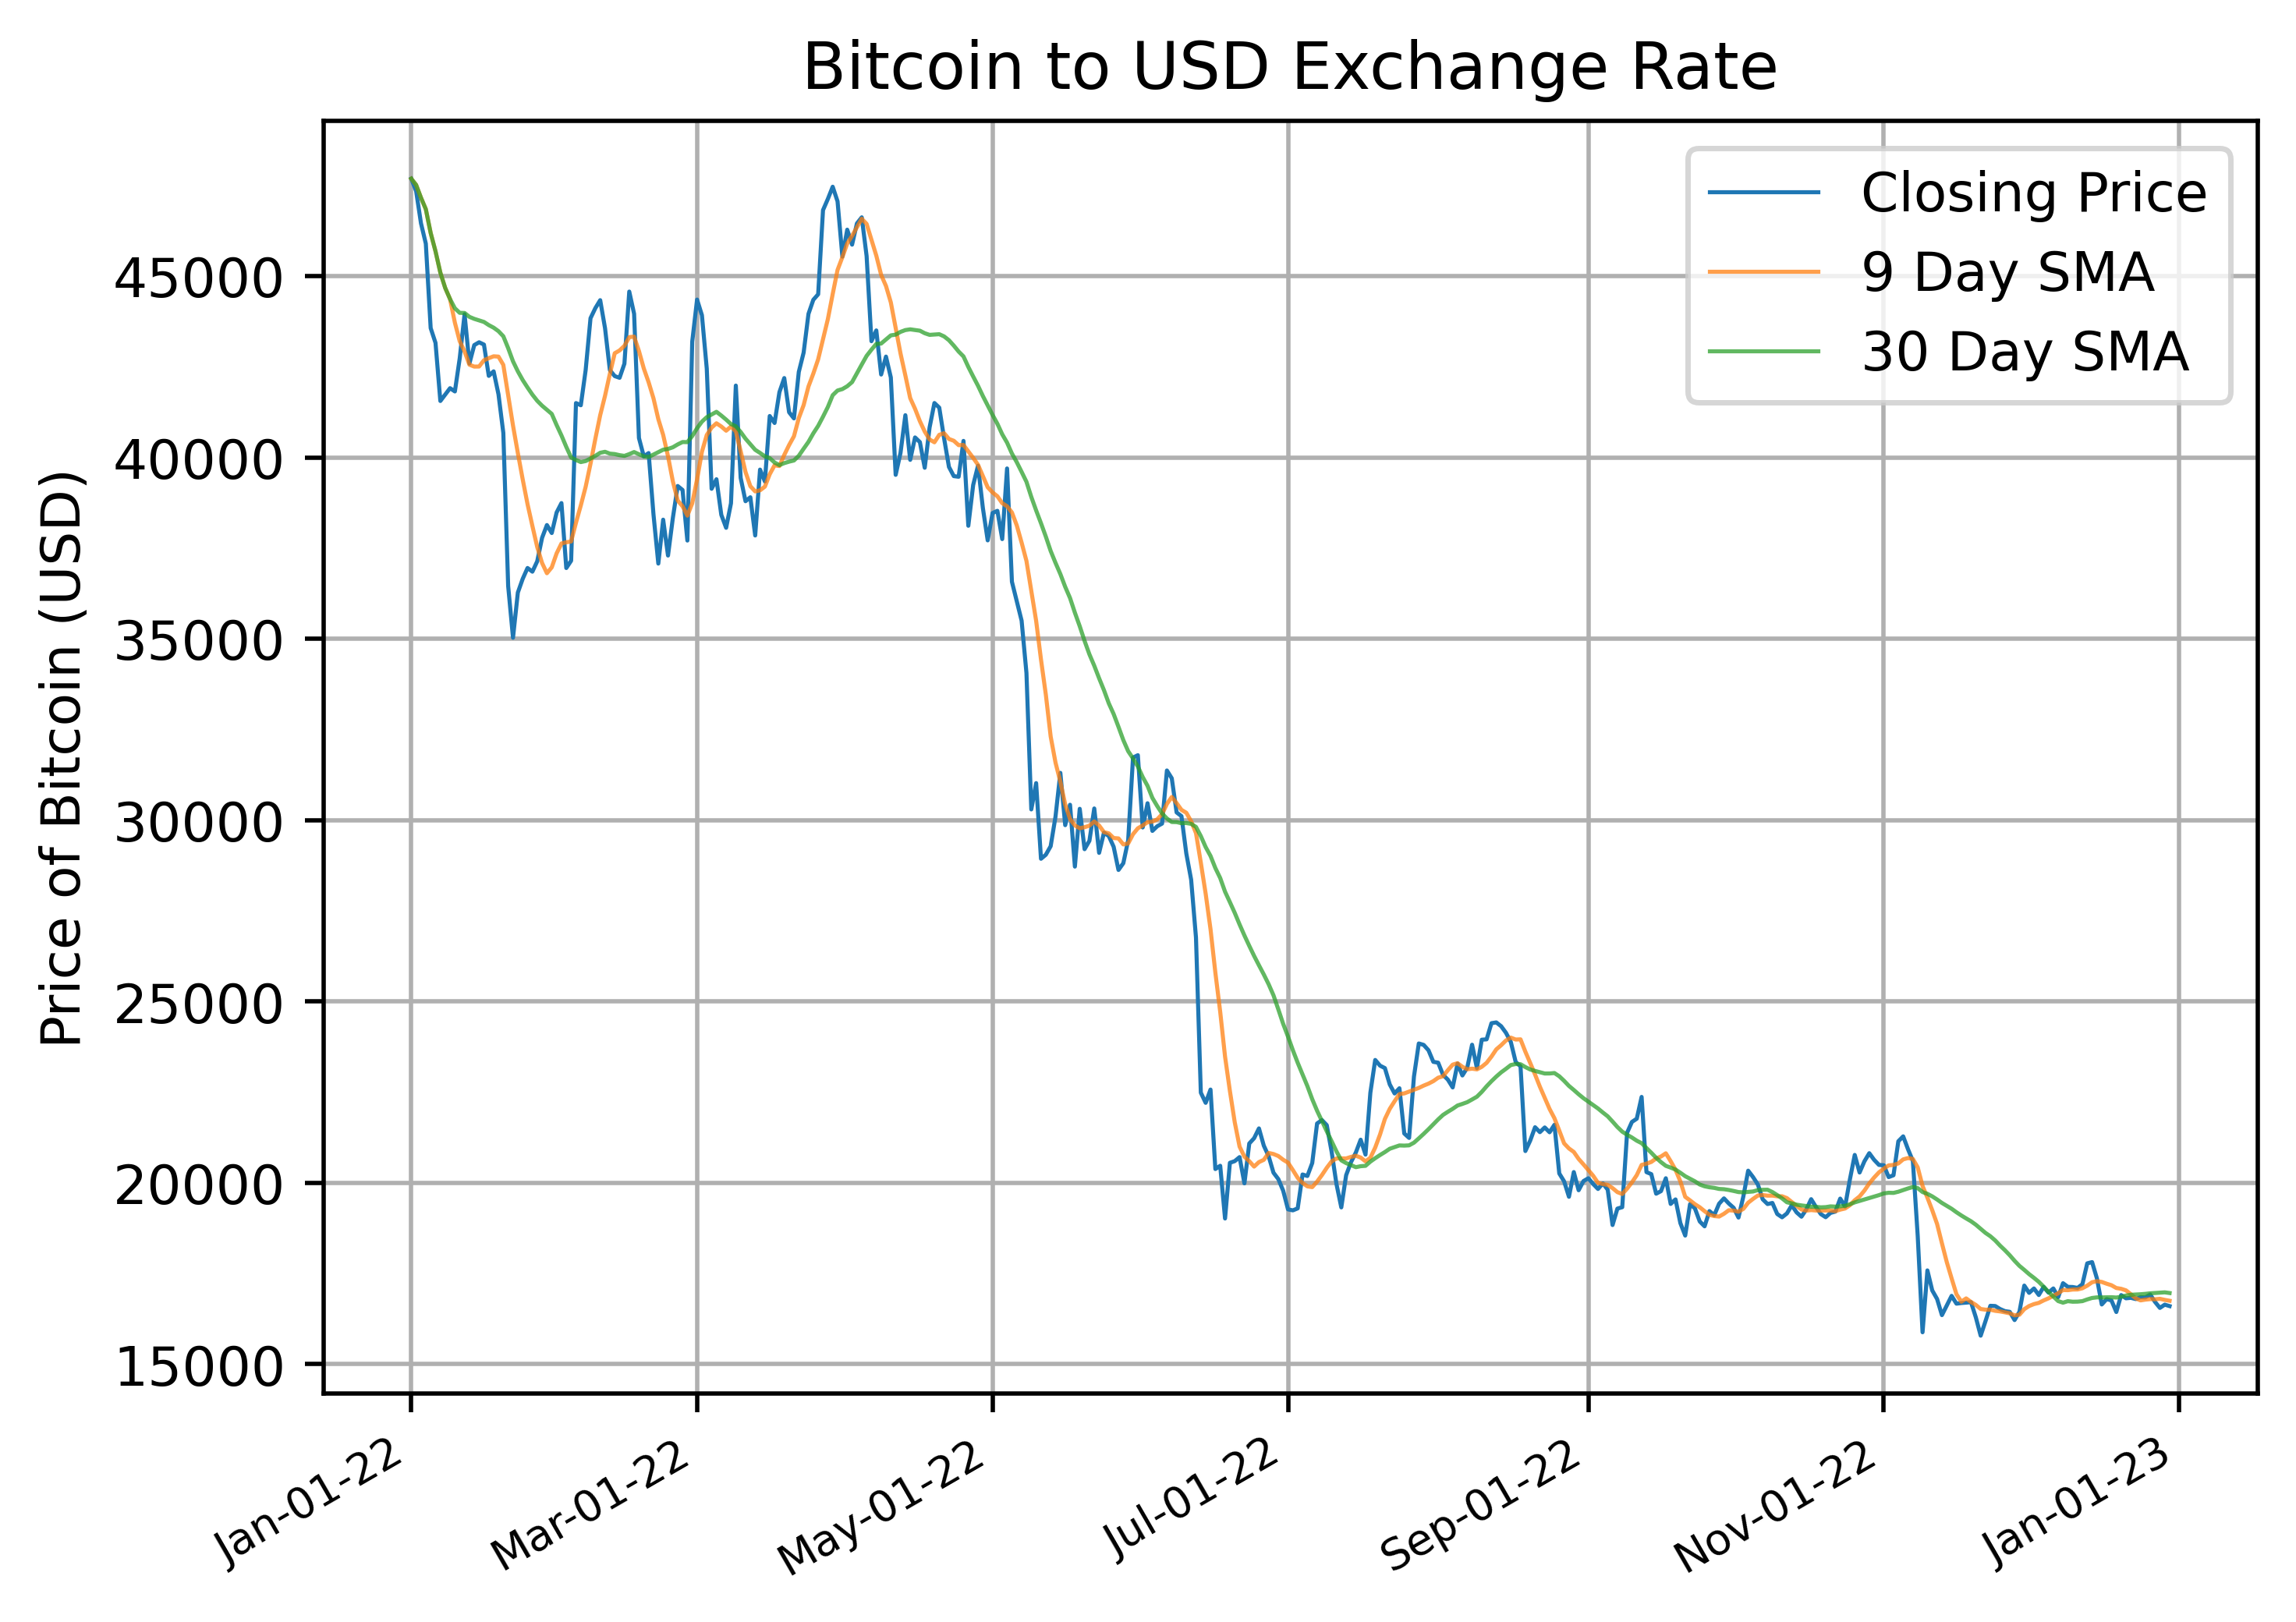

In [16]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

# Plotting the 9-day Simple Moving Average (SMA) of Bitcoin's closing prices against the dates.
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

As expected,  The 30-day SMA's smoothing effect is more pronounced than the 9-day SMA because it considers a more extended period of price data. As a result, it reacts more slowly to price changes, reducing the influence of short-term fluctuations.

The SMAs help to reduce the noise and erratic movements seen in the raw Bitcoin price data (closing prices). This smoothing effect is particularly evident when comparing the original Bitcoin price line to the two SMAs. As the interval increases, more short-term fluctuations are averaged out, resulting in a smoother line.

## Making Profit

##### The general principle is to buy an asset at a low price, then sell it at a higher price and pocket the difference. We can try to improve our chances of making a good trade beyond blind luck by sticking to a trading strategy.

##### One of the simplest trading strategies making use of Simple Moving Averages is the Moving Average Crossover. The basic idea behind this strategy is to use two Simple Moving Averages - one with a relatively short sampling interval and the other with a longer interval. When the shorter moving average crosses over the longer interval moving average, it can signal a reversal in trend

In [17]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

Now we have a dataframe containing the dates we're interested in and two Simple Moving Averages, one with a short interval and the other with a longer sampling interval. This gives us the information we need to figure out where the two Moving Averages cross, which is the core of this trading strategy.

In [18]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

##### According to our Moving Average Crossover strategy, we want to buy when the short-term SMA crosses the long-term SMA from below, and sell when it crosses over from above. We can easily use the Signal column in the trade_signals dataframe to determine where exactly these events occur. If the Signal column has value 0.0 on a given date then switches to 1.0, this means the short-term SMA crossed the long-term SMA from below - this is our time to buy Bitcoin according to our strategy. On the other hand, if the value goes from 1.0 to 0.0, that tells us the short-term SMA was above the long-term SMA and then crossed over - this is our time to sell.

In [19]:
trade_signals['Position'] = trade_signals['Signal'].diff()

##### Using this method, we can easily compute the action the algorithm should take at each step. Suppose the short-term SMA is below the long-term SMA. Then for that period, the Signal column will have the value 0. Then suppose we have a crossing, such that the short-term SMA now moves above the long-term one. 

##### Then the Signal column will now have value 1.0 and so the diff() method will compute the difference between the Signal value that day and the one before, i.e.,  1−0=1, thus giving us a Positions value of 1 for that day (i.e., a buy order). 

##### The opposite scenario occurs when the short-term SMA crosses back underneath the long-term SMA. the diff() method assigns a value of  0−1=−1 to the Position column on the day of the crossing (i.e., a sell order). On the days where there is no crossing, each consecutive day has the same value in the Signal column, so the diff() method assigns a value of 0 to the Position column.



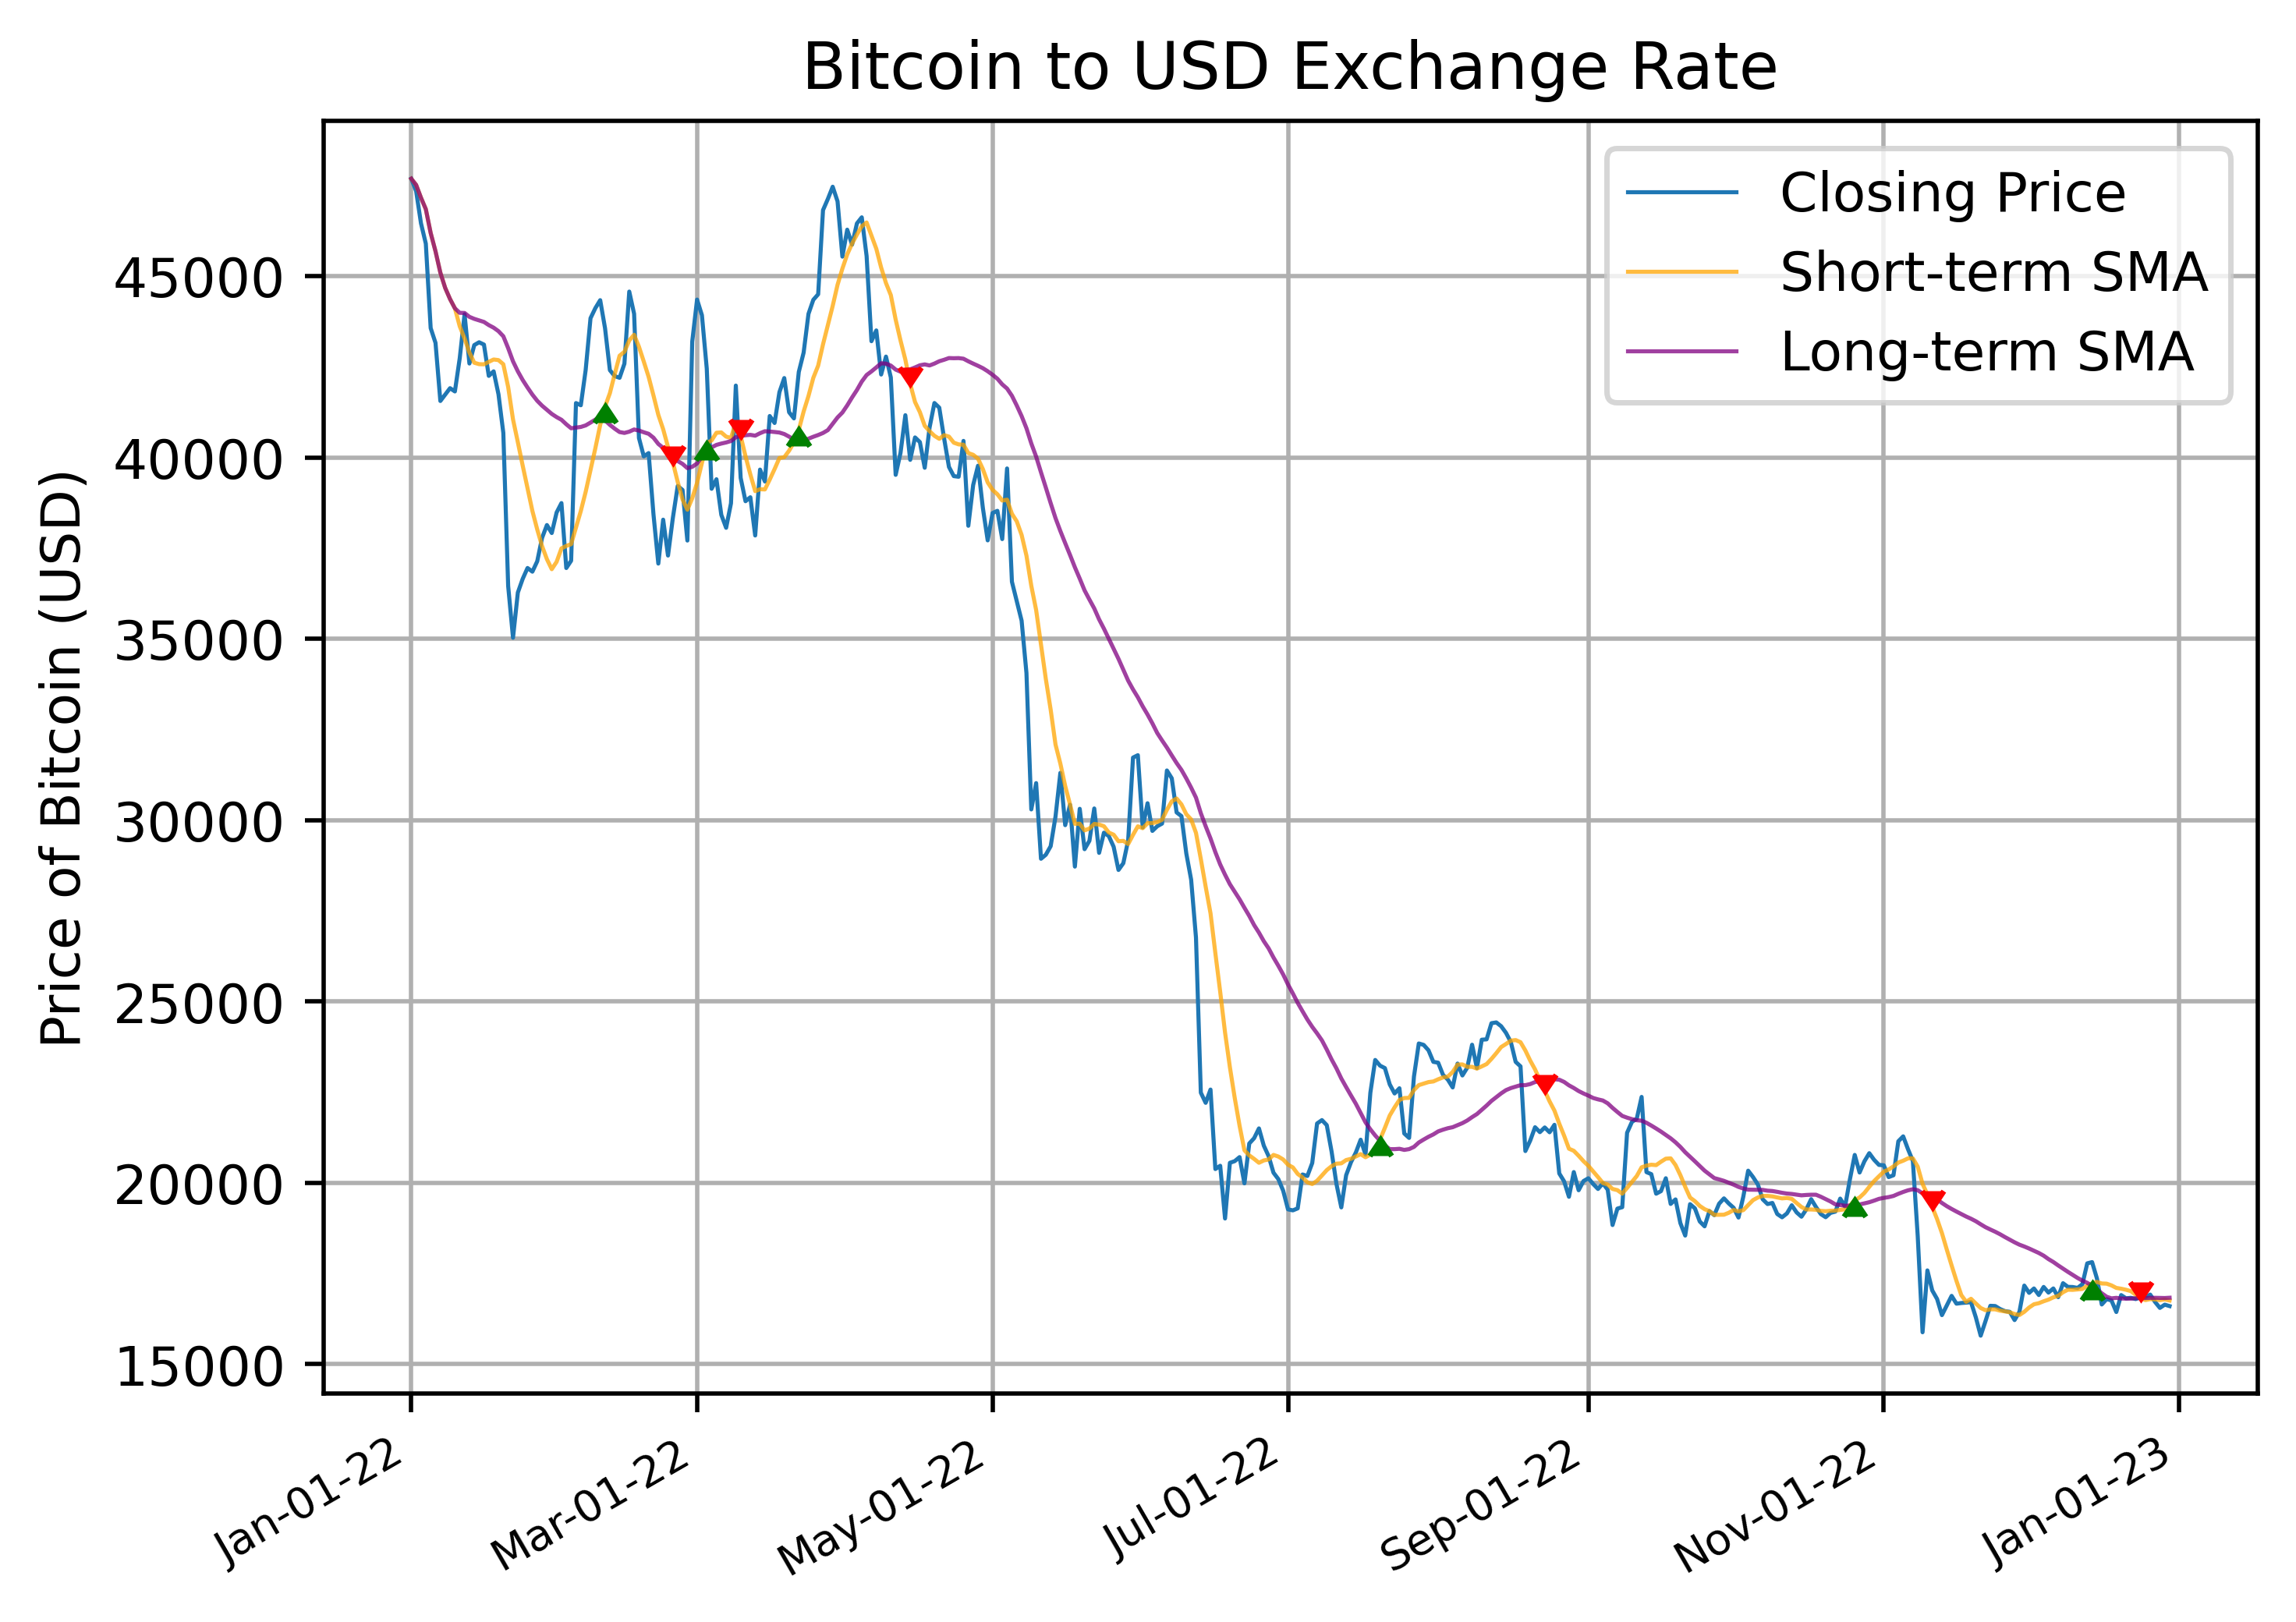

In [22]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
# Green arrows at the positions where the trading strategy indicates buy signals. 
# The buy signals are determined by a 'Position' column in the trade_signals DataFrame, where a value of 1.0 indicates a buy signal. 
# The green arrows are added at the corresponding index positions on the plot.
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

# Adding red arrows to indicate sell orders
# Red arrows at the positions where the trading strategy indicates sell signals
# DataFrame, where a value of -1.0 indicates a sell signal
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()